In [64]:
import spacy
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
data = pd.read_csv('Spam_SMS.csv')
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- EDA

In [16]:
data.isna().sum()

Class      0
Message    0
dtype: int64

In [21]:
data.Class.value_counts()

Class
ham     4827
spam     747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Class'>

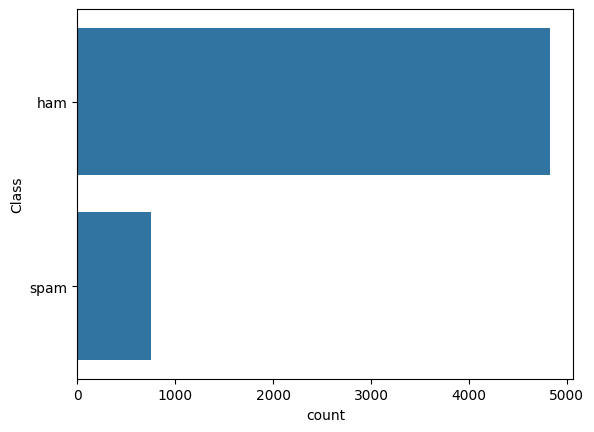

In [20]:
sns.countplot(data['Class'])

- Data Preprocessing

In [22]:
nlp_model = spacy.load('en_core_web_lg')

In [25]:
def preprocess_content(text):
    
    word = nlp_model(text)
    filtered_tokens = []

    for tokens in word:
        if tokens.is_stop or tokens.is_punct or tokens.text.startswith("@"): 
            continue
        filtered_tokens.append(tokens.lemma_.lower())

    return " ".join(filtered_tokens)

In [26]:
data['filtered_messages'] = data.Message.apply(preprocess_content)

In [34]:
df_ham = data[data['Class'] == 'ham']
df_spam = data[data['Class'] == 'spam']

df_ham.shape

(4827, 3)

In [36]:
count_ham, count_spam = data.Class.value_counts()
count_ham, count_spam

(4827, 747)

In [37]:
spam_over = df_spam.sample(count_ham, replace=True)

final_df = pd.concat([df_ham, spam_over],axis=0)
final_df.Class.value_counts()

Class
ham     4827
spam    4827
Name: count, dtype: int64

In [43]:
encoder = LabelEncoder()

final_df['new_label'] = encoder.fit_transform(final_df['Class'])

In [44]:
final_df.head()

,Class,Message,filtered_messages,new+label,new_label
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,0,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0,0
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live,0,0
6,ham,Even my brother is not like to speak with me. ...,brother like speak treat like aid patent,0,0


- Model Development

In [45]:
x = final_df['filtered_messages']
y = final_df['new_label']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rand', RandomForestClassifier())
])

model.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rand', RandomForestClassifier())])

In [52]:
ypred = model.predict(x_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00       940

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [65]:
f1 = f1_score(y_test, ypred, average='weighted')
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
accuracy = accuracy_score(y_test, ypred)

print("Rand Forest Classifier Model Evaluation")
print("Accuracy score:", "{:.2f}".format(round(accuracy, 2)))
print("F1 score:", "{:.2f}".format(round(f1, 2)))
print("Precision score:", "{:.2f}".format(round(precision, 2)))
print("Recall score:", "{:.2f}".format(round(recall, 2)))

Rand Forest Classifier Model Evaluation
Accuracy score: 1.00
F1 score: 1.00
Precision score: 1.00
Recall score: 1.00


In [67]:
conf_mat = confusion_matrix(y_test, ypred)
conf_mat

array([[988,   3],
       [  0, 940]], dtype=int64)

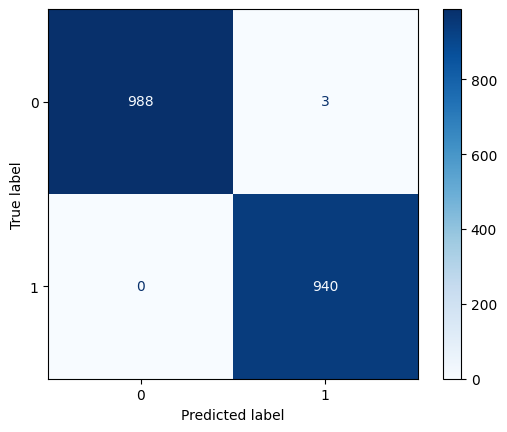

In [68]:
ConfusionMatrixDisplay(conf_mat).plot(cmap='Blues')

In [70]:
import joblib
joblib.dump(model, "SMS model.joblib")

['SMS model.joblib']

In [55]:
model.predict(['Free entry in 2 a wkly comp to win FA '])

array([1])

In [56]:
model.predict(['get home now'])

array([0])